In [6]:
import matplotlib.pyplot as plt
plt.style.use("classic")
import numpy as np
from scipy import linalg as la
import csv

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

In [7]:
N = 5000

x1 = np.random.normal(loc = 0, scale = 1, size = N)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = N)
x3 = 2 * x1 + x2

M = np.array([x1, x2, x3])

print ("Dataset:\n", M, "\n")


Dataset:
 [[-0.14154938 -1.10663077  0.45462183 ...  0.06525924 -1.12897278
  -0.84190314]
 [-1.44289205  0.29237366 -1.08617418 ... -1.1934329  -0.37426877
  -2.24400707]
 [-1.72599081 -1.92088788 -0.17693052 ... -1.06291443 -2.63221432
  -3.92781335]] 



* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix.

* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result

In [8]:
### Using the eigendecomposition of the covariance matrix ###

# compute the mean of each sequence (row) and set the right shape
M_mean = M.mean(axis = 1)[:, np.newaxis]

# re-center each sequence (row) around its mean
w = M - M_mean

# compute the covariance matrix
cov = w.dot(w.T) / (N - 1)
print("Covariance matrix:")
print(cov)



### Using the the eigendecomposition of the covariance matrix ###
l, V = la.eig(cov)
print("\nUsing eigendecomposition of the covariance matrix: ")
order_mask = np.argsort(l)[::-1] # rearrange in descending order
print(l)
l_ordered = np.real_if_close(l)[order_mask]
print("- Eigenvalues:\n", l)
print("- Real eigenvalues:\n", l_ordered)
V_ordered = V[:, order_mask]
print("- Eigenvectors:\n", V_ordered)

D1 = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
if (np.allclose(cov, D1)):
    print("The eigendecomposition of the covariance matrix was successful.")
else:
    print("The eigendecomposition of the covariance matrix was NOT successful.")



### Using the the Singular Value Decomposition of the covariance matrix ###
U, S, Vt = la.svd(cov)
print("\nUsing SVD of the covariance matrix: ")
order_mask = np.argsort(S)[::-1] # rearrange in descending order
S_ordered = S[order_mask]
print("- Eigenvalues:\n", S_ordered)
U_ordered = U[:, order_mask]
print("- Eigenvectors:\n", U_ordered)

# Let's verify the definition of SVD by hand
D2 = np.zeros(np.shape(cov))
for i in range(min(np.shape(cov))):
    D2[i, i] = S[i]
SVD = np.dot(U, np.dot(D2, Vt))
if (np.allclose(cov, SVD)):
    print("The SVD was successful.\n")
else:
    print("The SVD was NOT successful.\n")



if (np.allclose(S_ordered, l_ordered)):
    print("The eigenvalues obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvalues obtained by SVD and eigendecomposition are NOT the same.")
if (np.allclose(U_ordered, V_ordered)):
    print("The eigenvectors obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvectors obtained by SVD and eigendecomposition are NOT the same.")

Covariance matrix:
[[ 0.97991666  0.97643899  2.93627232]
 [ 0.97643899 10.25977323 12.21265121]
 [ 2.93627232 12.21265121 18.08519585]]

Using eigendecomposition of the covariance matrix: 
[ 2.73267823e+01+0.j -4.03903937e-17+0.j  1.99810345e+00+0.j]
- Eigenvalues:
 [ 2.73267823e+01+0.j -4.03903937e-17+0.j  1.99810345e+00+0.j]
- Real eigenvalues:
 [ 2.73267823e+01  1.99810345e+00 -4.03903937e-17]
- Eigenvectors:
 [[-0.11132099  0.56651652 -0.81649658]
 [-0.58251721 -0.70285634 -0.40824829]
 [-0.8051592   0.43017671  0.40824829]]
The eigendecomposition of the covariance matrix was successful.

Using SVD of the covariance matrix: 
- Eigenvalues:
 [2.73267823e+01 1.99810345e+00 1.57611334e-16]
- Eigenvectors:
 [[-0.11132099  0.56651652 -0.81649658]
 [-0.58251721 -0.70285634 -0.40824829]
 [-0.8051592   0.43017671  0.40824829]]
The SVD was successful.

The eigenvalues obtained by SVD and eigendecomposition are the same.
The eigenvectors obtained by SVD and eigendecomposition are the same.


* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained

The ppal. component [0, 0] of the lambda matrix accounts for a 93.1863214609999631 per cent of the variability.
The ppal. component [1, 1] of the lambda matrix accounts for a 6.8136785390000298 per cent of the variability.
The ppal. component [2, 2] of the lambda matrix accounts for a 0.0000000000000001 per cent of the variability.


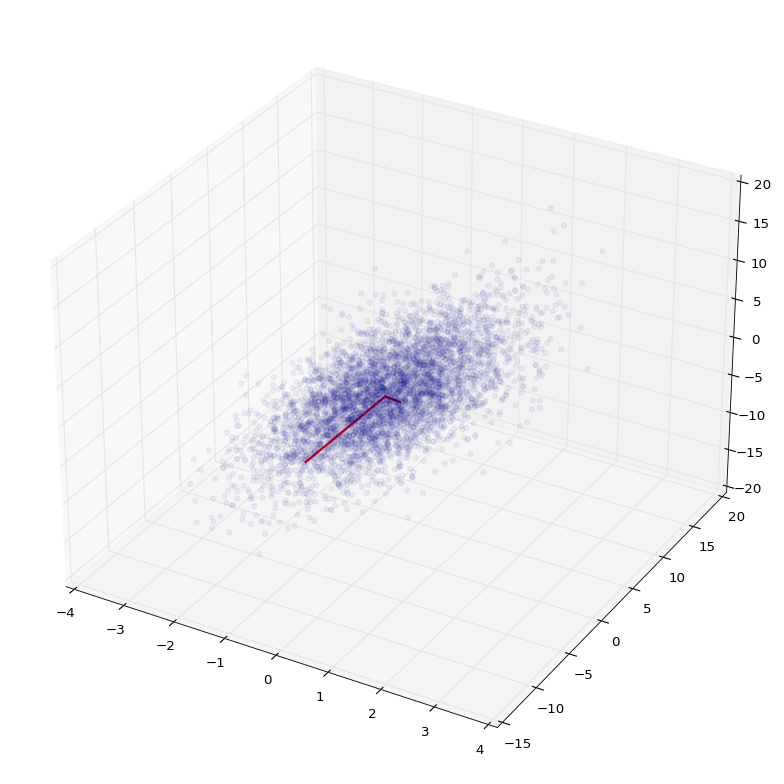

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax = plt.axes(projection = "3d")

ax.scatter(M[0, :], M[1, :], M[2, :], alpha = 0.05)
# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    # the line is defined by specifying its beginning and its end 
    ax.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


# let us compute the lambda matrix
Lambda = np.diag(l_ordered)
comp = [[0, 0], [1, 1], [2, 2]]
var = abs(Lambda[0,0])/Lambda.trace(), abs(Lambda[1,1])/Lambda.trace(), abs(Lambda[2,2])/Lambda.trace()

for c, v in zip(comp, var):
    print("The ppal. component [%i, %i] of the lambda matrix accounts for a %.16f per cent of the variability." % (*c, v*100))

# reducing the dimensionality of the system by setting to zero the eigenvalue with less than 1% per cent variability retained.
Lambda[np.isclose(Lambda, 0)] = 0

***********************The majority of the variability of the data comes from the first component, then from the third component, and the second component barely introduces variability.******************

* Redefine the data according to the new basis from the PCA


The redefined data:
[[ 2.24596425e+00  1.49949908e+00  7.24563438e-01 ...  1.54374581e+00
   2.46304794e+00  4.56340928e+00]
 [-3.61856481e-16  1.14779743e-16 -3.75210906e-16 ... -3.14876460e-16
  -2.52020606e-17 -5.55042700e-16]
 [ 1.91474707e-01 -1.65874252e+00  9.44863793e-01 ...  4.18541283e-01
  -1.50884185e+00 -5.89391277e-01]]


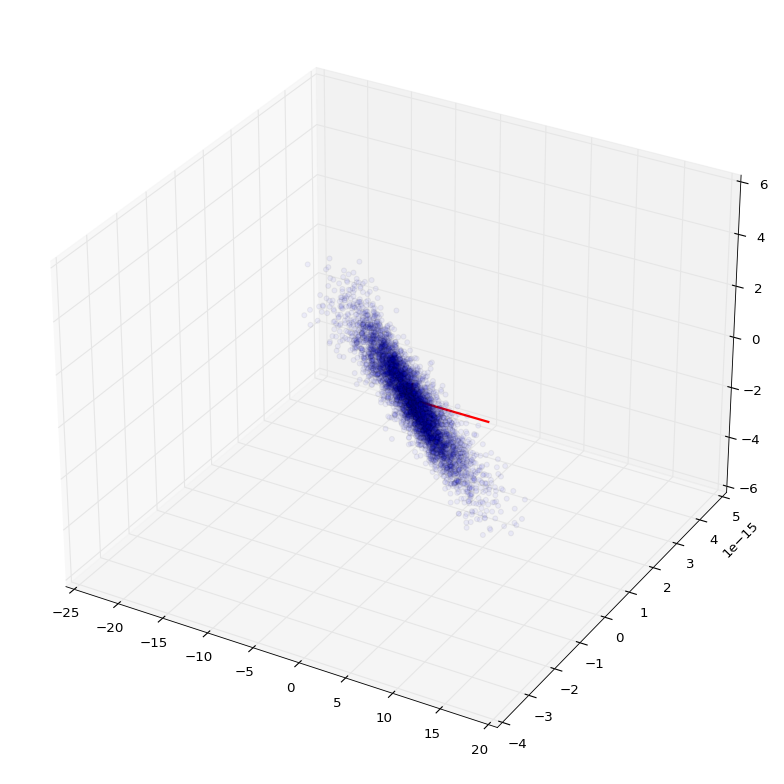

In [11]:
# eliminate the component with less than 1% contribution from the eigenvector matrix
#V[:, np.isclose(np.real_if_close(l), 0)] = 0

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Mp = np.dot(V.T, M)

print("\nThe redefined data:")
print(Mp)

# then plot the rotated dataset and its "axes"
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax = plt.axes(projection = "3d")

ax.scatter(Mp[0,:], Mp[1,:], Mp[2, :], alpha = 0.05)

# reducing the dimensionality of the eigenvalues array
l_red = np.real_if_close(l.copy())
l_red[np.isclose(np.real_if_close(l_red), 0)] = 0

# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l_red, np.diag([1]*len(l_red))):
    ax.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw = 2)

* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

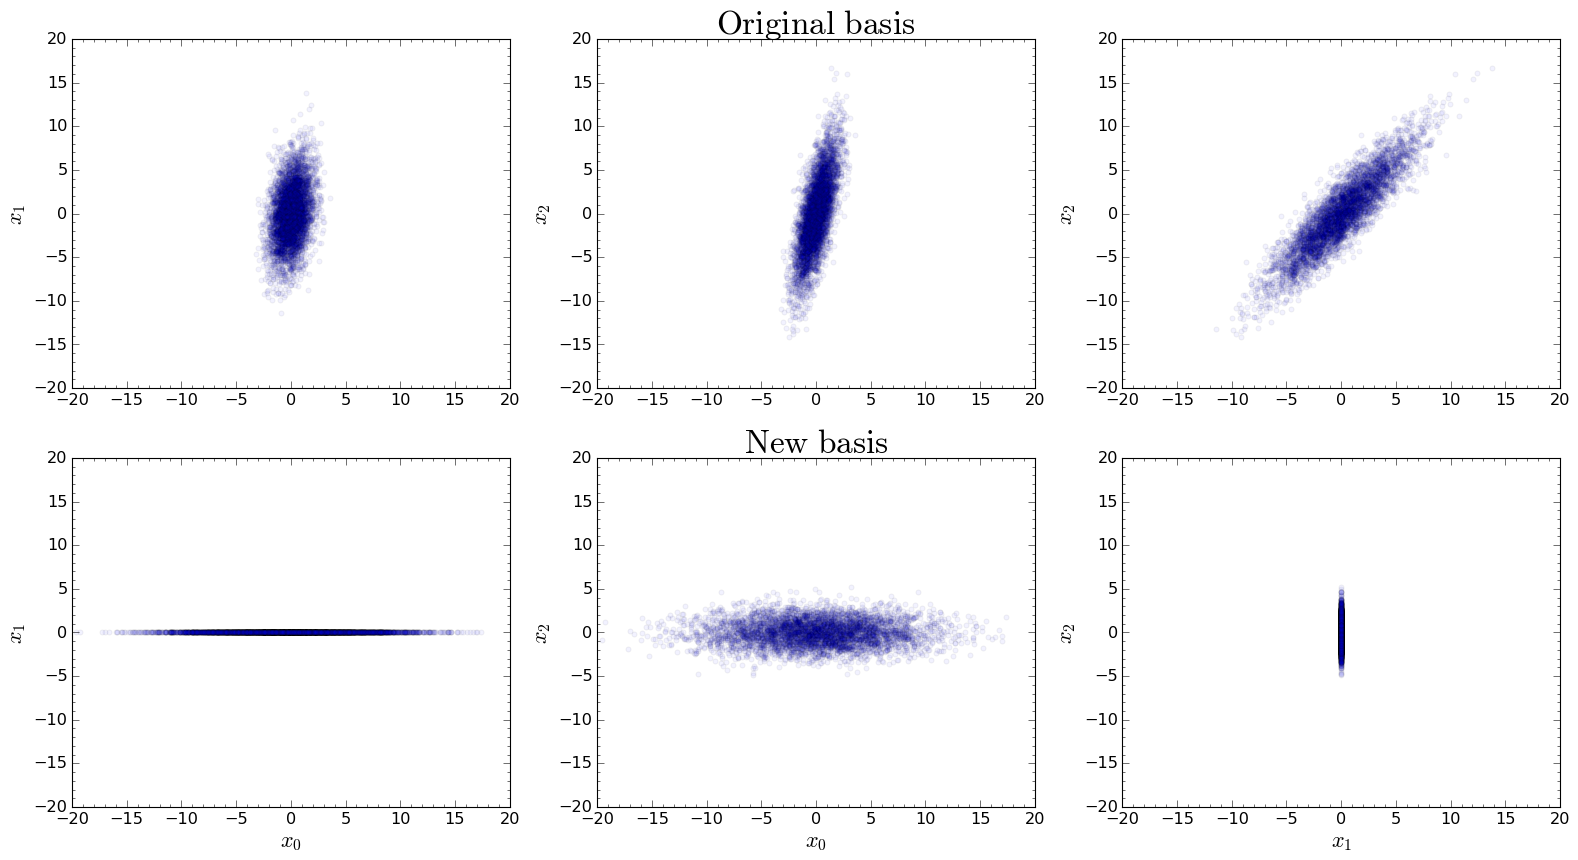

In [12]:
fig, ax = plt.subplots(2, 3); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
for i in range(len(ax[:, 0])):
    for j in range(len(ax[0, :])):
        ax[i, j].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
        ax[i, j].minorticks_on()
        ax[i, j].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
        ax[i, j].tick_params(axis = 'both', labelsize = 14.5)
        
        ax[i, j].set_xlim(-20, 20)
        ax[i, j].set_ylim(-20, 20) # uniforming the axes for a better visualization of the effect of changing the basis

        ax[i, 0].set_ylabel("$x_{1}$", fontsize = 20); ax[i, 1].set_ylabel("$x_{2}$", fontsize = 20); ax[i, 2].set_ylabel("$x_{2}$", fontsize = 20)
ax[1, 0].set_xlabel("$x_{0}$", fontsize = 20); ax[1, 1].set_xlabel("$x_{0}$", fontsize = 20); ax[1, 2].set_xlabel("$x_{1}$", fontsize = 20)

bigax = fig.add_subplot(211, frameon=False)
bigax.set_title("${\\rm Original\ basis}$", fontsize = 30)
bigax2 = fig.add_subplot(212, frameon=False)
bigax2.set_title("${\\rm New\ basis}$", fontsize = 30)
for axes in (bigax, bigax2):
    axes.spines['top'].set_color('none')
    axes.spines['bottom'].set_color('none')
    axes.spines['left'].set_color('none')
    axes.spines['right'].set_color('none')
    axes.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

ax[0, 0].scatter(M[0, :], M[1, :], alpha = 0.05)
ax[0, 1].scatter(M[0, :], M[2, :], alpha = 0.05)
ax[0, 2].scatter(M[1, :], M[2, :], alpha = 0.05)

ax[1, 0].scatter(Mp[0, :], Mp[1, :], alpha = 0.05)
ax[1, 1].scatter(Mp[0, :], Mp[2, :], alpha = 0.05)
ax[1, 2].scatter(Mp[1, :], Mp[2, :], alpha = 0.05)



2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [13]:
def random_features(dimension, N):
    features = []
    for i in range(dimension):
        sigma = np.abs(1 * np.random.normal(loc = 0, scale = 1, size = (1,)) + 4 * np.random.normal(loc = 0, scale = 1, size = (1,))) / 20
        mean = 0
        features.append(np.random.normal(loc = mean, scale = sigma, size = (N,)))
    return features

random_noise = random_features(10, N)
M = np.array([x1, x2, x3, *random_noise])
print ("Dataset:\n", M, "\n")

Dataset:
 [[-1.41549381e-01 -1.10663077e+00  4.54621831e-01 ...  6.52592389e-02
  -1.12897278e+00 -8.41903139e-01]
 [-1.44289205e+00  2.92373662e-01 -1.08617418e+00 ... -1.19343290e+00
  -3.74268768e-01 -2.24400707e+00]
 [-1.72599081e+00 -1.92088788e+00 -1.76930517e-01 ... -1.06291443e+00
  -2.63221432e+00 -3.92781335e+00]
 ...
 [-3.23863006e-02 -1.02076872e-01  8.64680742e-02 ... -9.14182824e-02
   1.33275417e-01  5.52130360e-02]
 [ 8.31709392e-03 -6.16081496e-03 -2.89879555e-02 ...  5.89883680e-03
  -7.12716449e-03  5.89794353e-05]
 [ 9.52588244e-02 -6.10516712e-01  3.12748725e-01 ... -1.15606382e-01
   4.16764588e-01 -6.80003259e-02]] 



In [14]:
### Using the eigendecomposition of the covariance matrix ###

# compute the mean of each sequence (row) and set the right shape
M_mean = M.mean(axis = 1)[:, np.newaxis]

# re-center each sequence (row) around its mean
w = M - M_mean

# compute the covariance matrix
cov = w.dot(w.T) / (N - 1)

### Using the the eigendecomposition of the covariance matrix ###
l, V = la.eig(cov)
print("\nUsing eigendecomposition of the covariance matrix: ")
order_mask = np.argsort(l)[::-1] # rearrange in descending order
print(l)
l_ordered = np.real_if_close(l)[order_mask]
print("- Real eigenvalues:\n", l_ordered)
V_ordered = V[:, order_mask]
print("- Eigenvectors:\n", V_ordered)

D1 = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
if (np.allclose(cov, D1)):
    print("The eigendecomposition of the covariance matrix was successful.")
else:
    print("The eigendecomposition of the covariance matrix was NOT successful.")



### Using the the Singular Value Decomposition of the covariance matrix ###
U, S, Vt = la.svd(cov)
print("\nUsing SVD of the covariance matrix: ")
order_mask = np.argsort(S)[::-1] # rearrange in descending order
S_ordered = S[order_mask]
print("- Eigenvalues:\n", S_ordered)
U_ordered = U[:, order_mask]
print("- Eigenvectors:\n", U_ordered)

# Let's verify the definition of SVD by hand
D2 = np.zeros(np.shape(cov))
for i in range(min(np.shape(cov))):
    D2[i, i] = S[i]
SVD = np.dot(U, np.dot(D2, Vt))
if (np.allclose(cov, SVD)):
    print("The SVD was successful.\n")
else:
    print("The SVD was NOT successful.\n")



if (np.allclose(S_ordered, l_ordered)):
    print("The eigenvalues obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvalues obtained by SVD and eigendecomposition are NOT the same.")
if (np.allclose(U_ordered, V_ordered)):
    print("The eigenvectors obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvectors obtained by SVD and eigendecomposition are NOT the same.")


Using eigendecomposition of the covariance matrix: 
[2.73269671e+01+0.j 1.99812290e+00+0.j 1.62949825e-01+0.j
 1.65453698e-01+0.j 4.72435082e-02+0.j 1.94598172e-02+0.j
 8.15914766e-03+0.j 6.87170975e-03+0.j 1.07999249e-03+0.j
 7.81117330e-04+0.j 7.47360891e-04+0.j 4.95120240e-16+0.j
 1.77100111e-05+0.j]
- Real eigenvalues:
 [2.73269671e+01 1.99812290e+00 1.65453698e-01 1.62949825e-01
 4.72435082e-02 1.94598172e-02 8.15914766e-03 6.87170975e-03
 1.07999249e-03 7.81117330e-04 7.47360891e-04 1.77100111e-05
 4.95120240e-16]
- Eigenvectors:
 [[ 1.11320521e-01  5.66513867e-01  2.24019905e-04  1.27821507e-03
   1.14192411e-03  8.28925799e-05 -9.13702396e-05 -1.97897232e-04
  -1.22601850e-04 -2.36154001e-04 -2.52501003e-05 -1.53898409e-06
   8.16496581e-01]
 [ 5.82515347e-01 -7.02851388e-01  1.50513508e-03 -1.76207336e-03
  -1.87967286e-03 -1.56998730e-04 -2.08407325e-04  2.46828392e-04
   1.57163720e-04  2.71913357e-04  7.11141208e-06 -6.97644816e-06
   4.08248290e-01]
 [ 8.05156389e-01  4.3

In this case, even though the eigenvalues obtained by the two methods are the same, the eigenvectors obtained are opposite to one another. In other words, every component of every eigenvector obtained by covariance matrix eigendecomposition has a relative minus sign with respect to the same component of the same eigenvector obtained by SVG. The principal components remain, however, the same, since the random noise barely introduces variability.

In [15]:
# let us compute the lambda matrix
Lambda = np.diag(l_ordered)
comp = [[i, i] for i in range(len(l))]
var = abs(Lambda[np.where(Lambda!=0)])/Lambda.trace()

for c, v in zip(comp, var):
    print("The ppal. component [%i, %i] of the lambda matrix accounts for a %.16f per cent of the variability." % (*c, v*100))

tolerance = 1. # in per cent

# reducing the dimensionality of the system by setting to zero the eigenvalue with less than 1% per cent variability retained.
Lambda[np.isclose(var*100, 0, atol = tolerance)] = 0
# reducing the dimensionality of the eigenvalues array
l_red = np.real_if_close(l.copy())
l_red[np.isclose(var*100, 0, atol = tolerance)] = 0
#V[:, np.isclose(var*100, 0, atol = tolerance)] = 0

print("\nWe have eliminated the components with less than %.1f per cent contribution to the variability." % tolerance)

The ppal. component [0, 0] of the lambda matrix accounts for a 91.8928689636423996 per cent of the variability.
The ppal. component [1, 1] of the lambda matrix accounts for a 6.7191227150353656 per cent of the variability.
The ppal. component [2, 2] of the lambda matrix accounts for a 0.5563740364402990 per cent of the variability.
The ppal. component [3, 3] of the lambda matrix accounts for a 0.5479542191175204 per cent of the variability.
The ppal. component [4, 4] of the lambda matrix accounts for a 0.1588665688802119 per cent of the variability.
The ppal. component [5, 5] of the lambda matrix accounts for a 0.0654378668304439 per cent of the variability.
The ppal. component [6, 6] of the lambda matrix accounts for a 0.0274369081424487 per cent of the variability.
The ppal. component [7, 7] of the lambda matrix accounts for a 0.0231076182102072 per cent of the variability.
The ppal. component [8, 8] of the lambda matrix accounts for a 0.0036317095662132 per cent of the variability.


In [16]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Mp = np.dot(V.T, M)

print("\nThe redefined data:")
print(Mp)


The redefined data:
[[-2.24710606e+00 -1.49893237e+00 -7.25071958e-01 ... -1.54390635e+00
  -2.46356462e+00 -4.56165475e+00]
 [ 1.90523424e-01 -1.66068829e+00  9.45437341e-01 ...  4.19217252e-01
  -1.50784145e+00 -5.88834945e-01]
 [ 2.84735111e-01  6.66971220e-01 -2.39296403e-01 ...  1.04141806e-01
  -3.83383175e-01 -4.43869131e-01]
 ...
 [ 4.44734769e-03 -3.36522718e-03 -2.81080354e-02 ...  3.11189550e-03
  -7.53034074e-03  5.14798109e-03]
 [-2.70670268e-16 -4.49143103e-16 -6.28358038e-17 ... -2.20320397e-16
  -9.20511876e-16 -6.71001072e-16]
 [ 7.86955931e-03  2.89853655e-03 -3.23643304e-03 ...  4.23001056e-03
   2.74236351e-03  6.02347878e-03]]


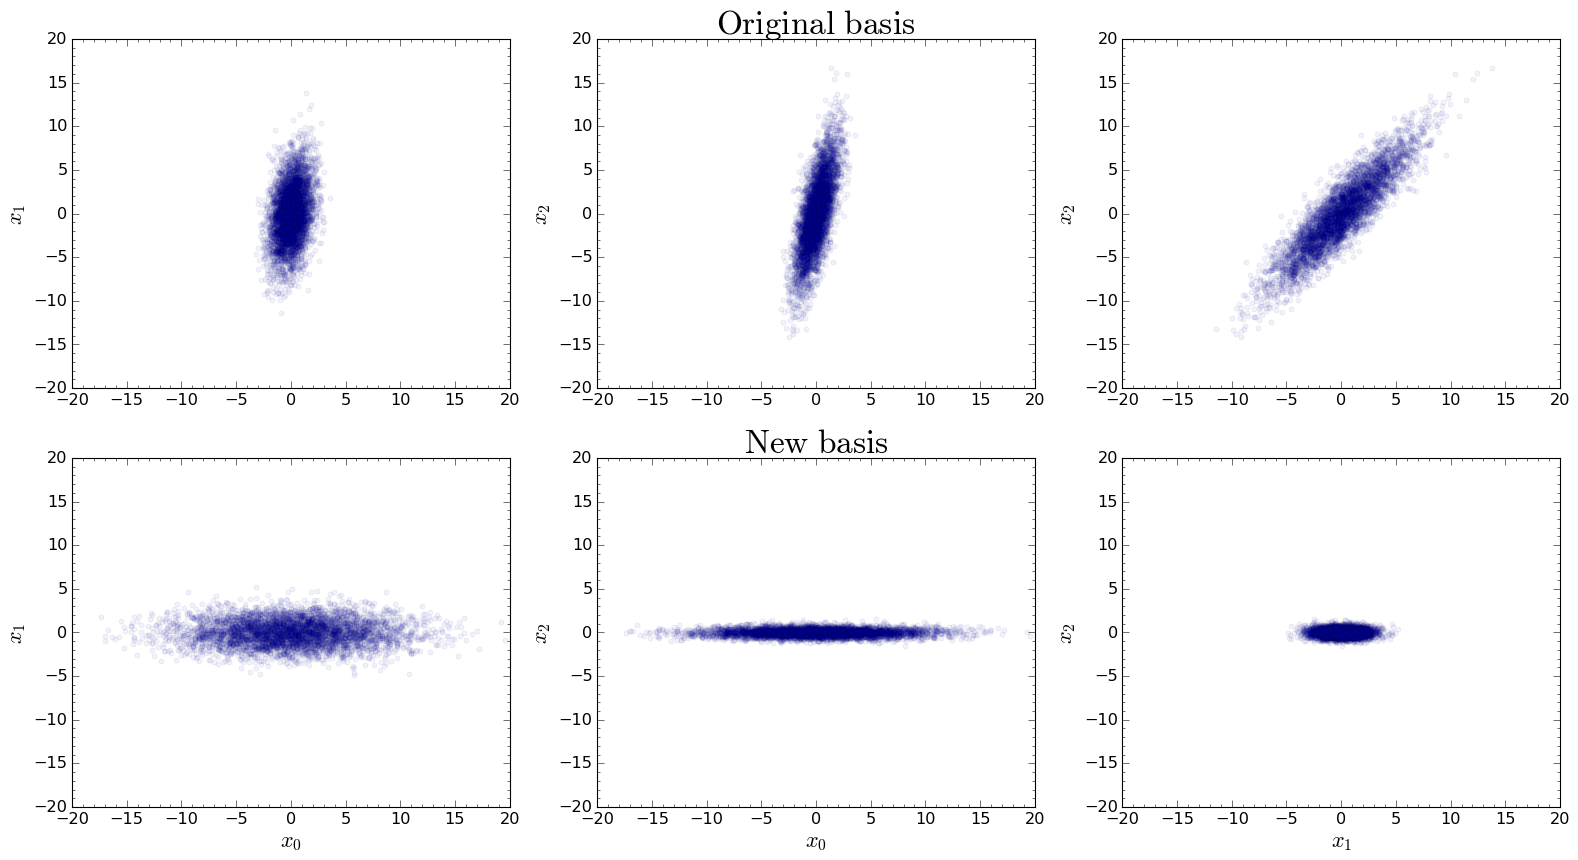

In [17]:
fig, ax = plt.subplots(2, 3); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
for i in range(len(ax[:, 0])):
    for j in range(len(ax[0, :])):
        ax[i, j].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
        ax[i, j].minorticks_on()
        ax[i, j].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
        ax[i, j].tick_params(axis = 'both', labelsize = 14.5)
        
        ax[i, j].set_xlim(-20, 20)
        ax[i, j].set_ylim(-20, 20) # uniforming the axes for a better visualization of the effect of changing the basis

        ax[i, 0].set_ylabel("$x_{1}$", fontsize = 20); ax[i, 1].set_ylabel("$x_{2}$", fontsize = 20); ax[i, 2].set_ylabel("$x_{2}$", fontsize = 20)
ax[1, 0].set_xlabel("$x_{0}$", fontsize = 20); ax[1, 1].set_xlabel("$x_{0}$", fontsize = 20); ax[1, 2].set_xlabel("$x_{1}$", fontsize = 20)

bigax = fig.add_subplot(211, frameon=False)
bigax.set_title("${\\rm Original\ basis}$", fontsize = 30)
bigax2 = fig.add_subplot(212, frameon=False)
bigax2.set_title("${\\rm New\ basis}$", fontsize = 30)
for axes in (bigax, bigax2):
    axes.spines['top'].set_color('none')
    axes.spines['bottom'].set_color('none')
    axes.spines['left'].set_color('none')
    axes.spines['right'].set_color('none')
    axes.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

ax[0, 0].scatter(M[0, :], M[1, :], alpha = 0.05)
ax[0, 1].scatter(M[0, :], M[2, :], alpha = 0.05)
ax[0, 2].scatter(M[1, :], M[2, :], alpha = 0.05)

ax[1, 0].scatter(Mp[0, :], Mp[1, :], alpha = 0.05)
ax[1, 1].scatter(Mp[0, :], Mp[2, :], alpha = 0.05)
ax[1, 2].scatter(Mp[1, :], Mp[2, :], alpha = 0.05)


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [18]:
M = np.matrix(np.zeros(10)).transpose()

with open('data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist = map(float, line[:-1])
        data = np.matrix([fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist]).transpose()
        category = line[-1]
        if (category == "g"):
            M = np.hstack((M, data))
M = np.delete(M, 0, axis = 1)


classes =  ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist"]
print("\nDataset for signal: ")
for i in range(len(classes)):
    print(classes[i], ": ", M[i, :])


Dataset for signal: 
fLength :  [[ 28.7967  31.6036 162.052  ...  22.0913  56.2216  31.5125]]
fWidth :  [[ 16.0021  11.7235 136.031  ...  10.8949  18.7019  19.2867]]
fSize :  [[2.6449 2.5185 4.0612 ... 2.2945 2.9297 2.9578]]
fConc :  [[0.3918 0.5303 0.0374 ... 0.5381 0.2516 0.2975]]
fConc1 :  [[0.1982 0.3773 0.0187 ... 0.2919 0.1393 0.1515]]
fAsym :  [[ 27.7004  26.2722 116.741  ...  15.2776  96.5758  38.1833]]
fM3Long :  [[ 22.011   23.8238 -64.858  ...  18.2296 -41.2969  21.6729]]
fM3Trans :  [[ -8.2027  -9.9574 -45.216  ...   7.3975  11.3764 -12.0726]]
fAlpha :  [[40.092   6.3609 76.96   ... 21.068   5.911  17.5809]]
fDist :  [[ 81.8828 205.261  256.788  ... 123.281  197.209  171.227 ]]


In [19]:
### Using the eigendecomposition of the covariance matrix ###

cov = np.cov(M)

### Using the the eigendecomposition of the covariance matrix ###
l, V = la.eig(cov)
print("\nUsing eigendecomposition of the covariance matrix: ")
order_mask = np.argsort(l)[::-1] # rearrange in descending order
l_ordered = np.real_if_close(l)[order_mask]
V_ordered = V[:, order_mask]


D1 = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
if (np.allclose(cov, D1)):
    print("The eigendecomposition of the covariance matrix was successful.")
else:
    print("The eigendecomposition of the covariance matrix was NOT successful.")



### Using the the Singular Value Decomposition of the covariance matrix ###
U, S, Vt = la.svd(cov)
print("\nUsing SVD of the covariance matrix: ")
order_mask = np.argsort(S)[::-1] # rearrange in descending order
S_ordered = S[order_mask]
U_ordered = U[:, order_mask]


# Let's verify the definition of SVD by hand
D2 = np.zeros(np.shape(cov))
for i in range(min(np.shape(cov))):
    D2[i, i] = S[i]
SVD = np.dot(U, np.dot(D2, Vt))
if (np.allclose(cov, SVD)):
    print("The SVD was successful.\n")
else:
    print("The SVD was NOT successful.\n")



if (np.allclose(S_ordered, l_ordered)):
    print("The eigenvalues obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvalues obtained by SVD and eigendecomposition are NOT the same.")
if (np.allclose(U_ordered, V_ordered)):
    print("The eigenvectors obtained by SVD and eigendecomposition are the same.")
else:
    print("The eigenvectors obtained by SVD and eigendecomposition are NOT the same.")


Using eigendecomposition of the covariance matrix: 
The eigendecomposition of the covariance matrix was successful.

Using SVD of the covariance matrix: 
The SVD was successful.

The eigenvalues obtained by SVD and eigendecomposition are the same.
The eigenvectors obtained by SVD and eigendecomposition are NOT the same.


In [20]:
# let us compute the lambda matrix
Lambda = np.diag(l_ordered)
comp = [[i, i] for i in range(len(l))]
var = abs(Lambda[np.where(Lambda!=0)])/Lambda.trace()

for c, v in zip(comp, var):
    print("The ppal. component [%i, %i] of the lambda matrix accounts for a %.16f per cent of the variability." % (*c, v*100))

tolerance = 1. # in per cent

# reducing the dimensionality of the system by setting to zero the eigenvalue with less than 1% per cent variability retained.
Lambda[np.isclose(var*100, 0, atol = tolerance)] = 0
# reducing the dimensionality of the eigenvalues array
l_red = np.real_if_close(l.copy())
l_red[np.isclose(var*100, 0, atol = tolerance)] = 0
#V[:, np.isclose(var*100, 0, atol = tolerance)] = 0

print("\nWe have eliminated the components with less than %.1f per cent contribution to the variability." % tolerance)

The ppal. component [0, 0] of the lambda matrix accounts for a 60.9860140867053104 per cent of the variability.
The ppal. component [1, 1] of the lambda matrix accounts for a 18.5918097880083693 per cent of the variability.
The ppal. component [2, 2] of the lambda matrix accounts for a 10.9010932297149914 per cent of the variability.
The ppal. component [3, 3] of the lambda matrix accounts for a 4.1802060223533939 per cent of the variability.
The ppal. component [4, 4] of the lambda matrix accounts for a 2.8910362703496273 per cent of the variability.
The ppal. component [5, 5] of the lambda matrix accounts for a 2.0236336523585718 per cent of the variability.
The ppal. component [6, 6] of the lambda matrix accounts for a 0.4256335563724629 per cent of the variability.
The ppal. component [7, 7] of the lambda matrix accounts for a 0.0004689439806830 per cent of the variability.
The ppal. component [8, 8] of the lambda matrix accounts for a 0.0001010017015657 per cent of the variability

In [21]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Mp = np.dot(V.T, M)

print("\nThe redefined data:")
print(Mp)


The redefined data:
[[ 7.96524162e+01  2.00545439e+02  2.51294197e+02 ...  1.19833108e+02
   1.79791430e+02  1.65832240e+02]
 [ 3.26012461e+01  3.18566105e+01  8.24829613e+01 ...  1.95324870e+01
   6.61509381e+01  4.15376762e+01]
 [ 1.32641293e+01  4.60509473e+01  1.17732055e+02 ...  2.43346757e+01
   1.15045159e+02  4.29251737e+01]
 ...
 [-1.76149932e+00 -1.58357845e+00  1.12926935e+00 ... -1.52272131e+00
  -1.83033118e+00 -1.88881333e+00]
 [-1.29834490e+00 -1.44888373e+00 -1.45729320e+00 ... -1.33624469e+00
  -1.30958934e+00 -1.30637834e+00]
 [ 1.05338330e-01  2.96120771e-02  9.59741909e-02 ...  1.00033450e-01
   8.72761263e-02  9.98649055e-02]]


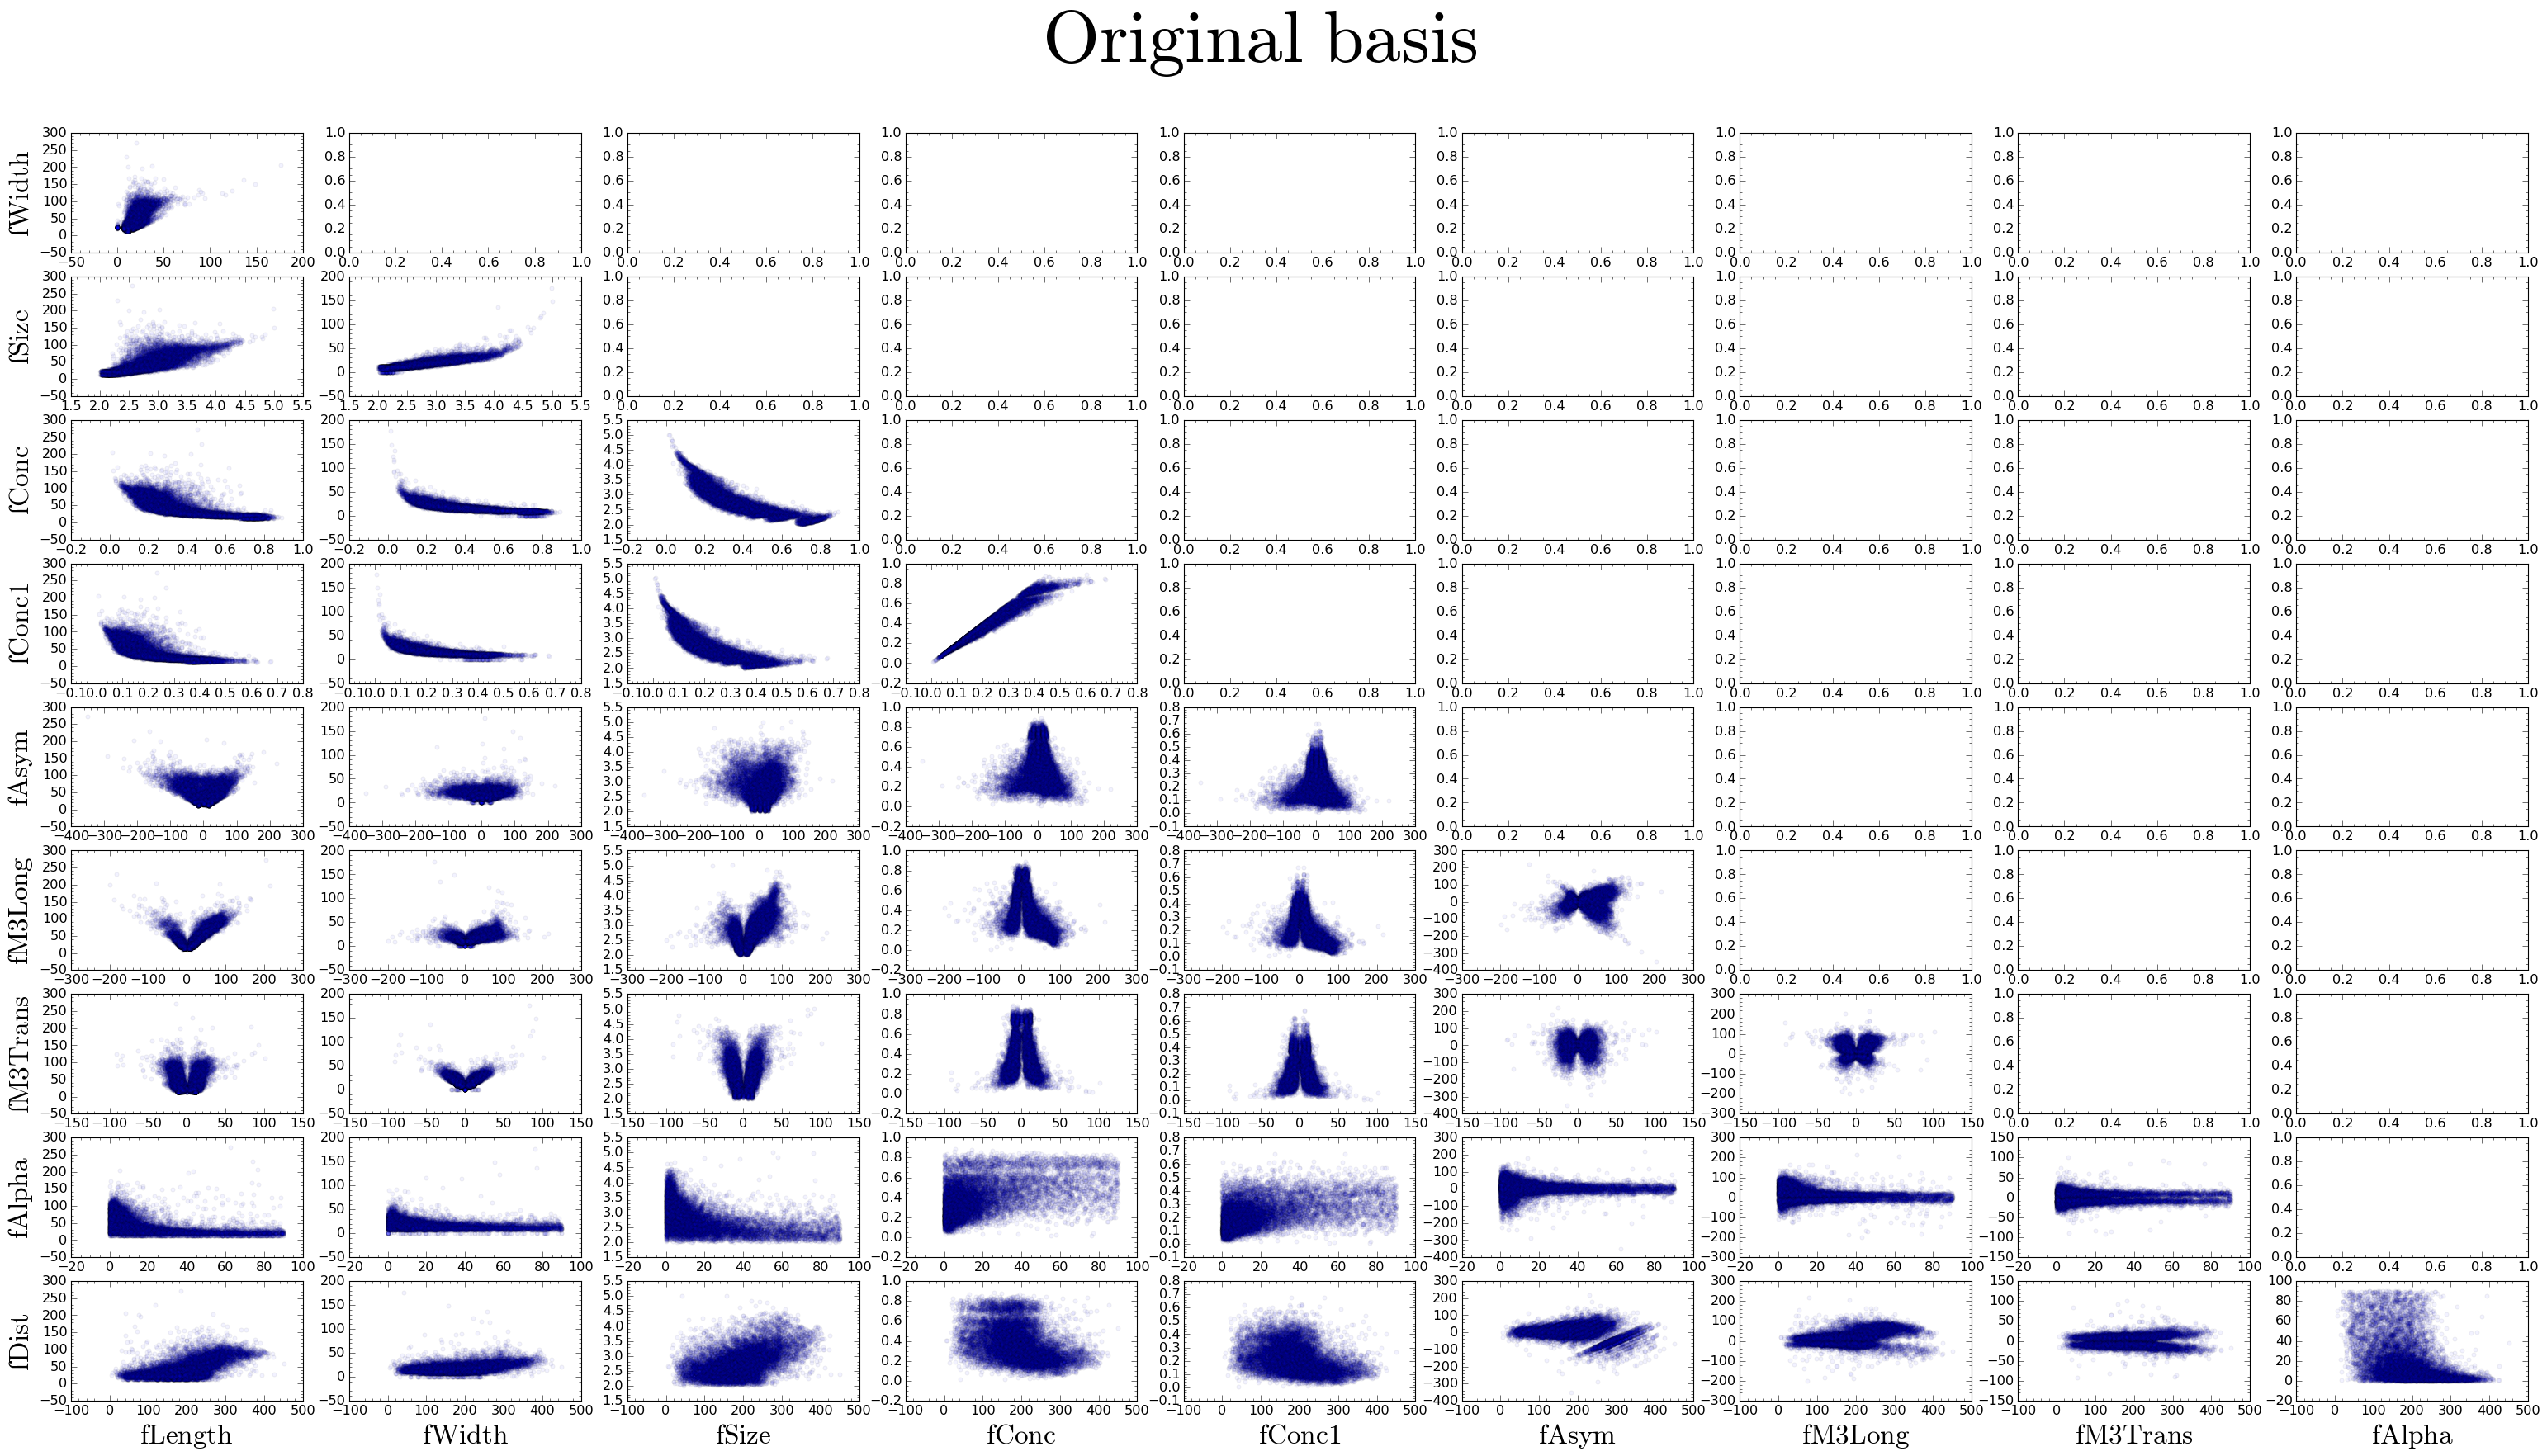

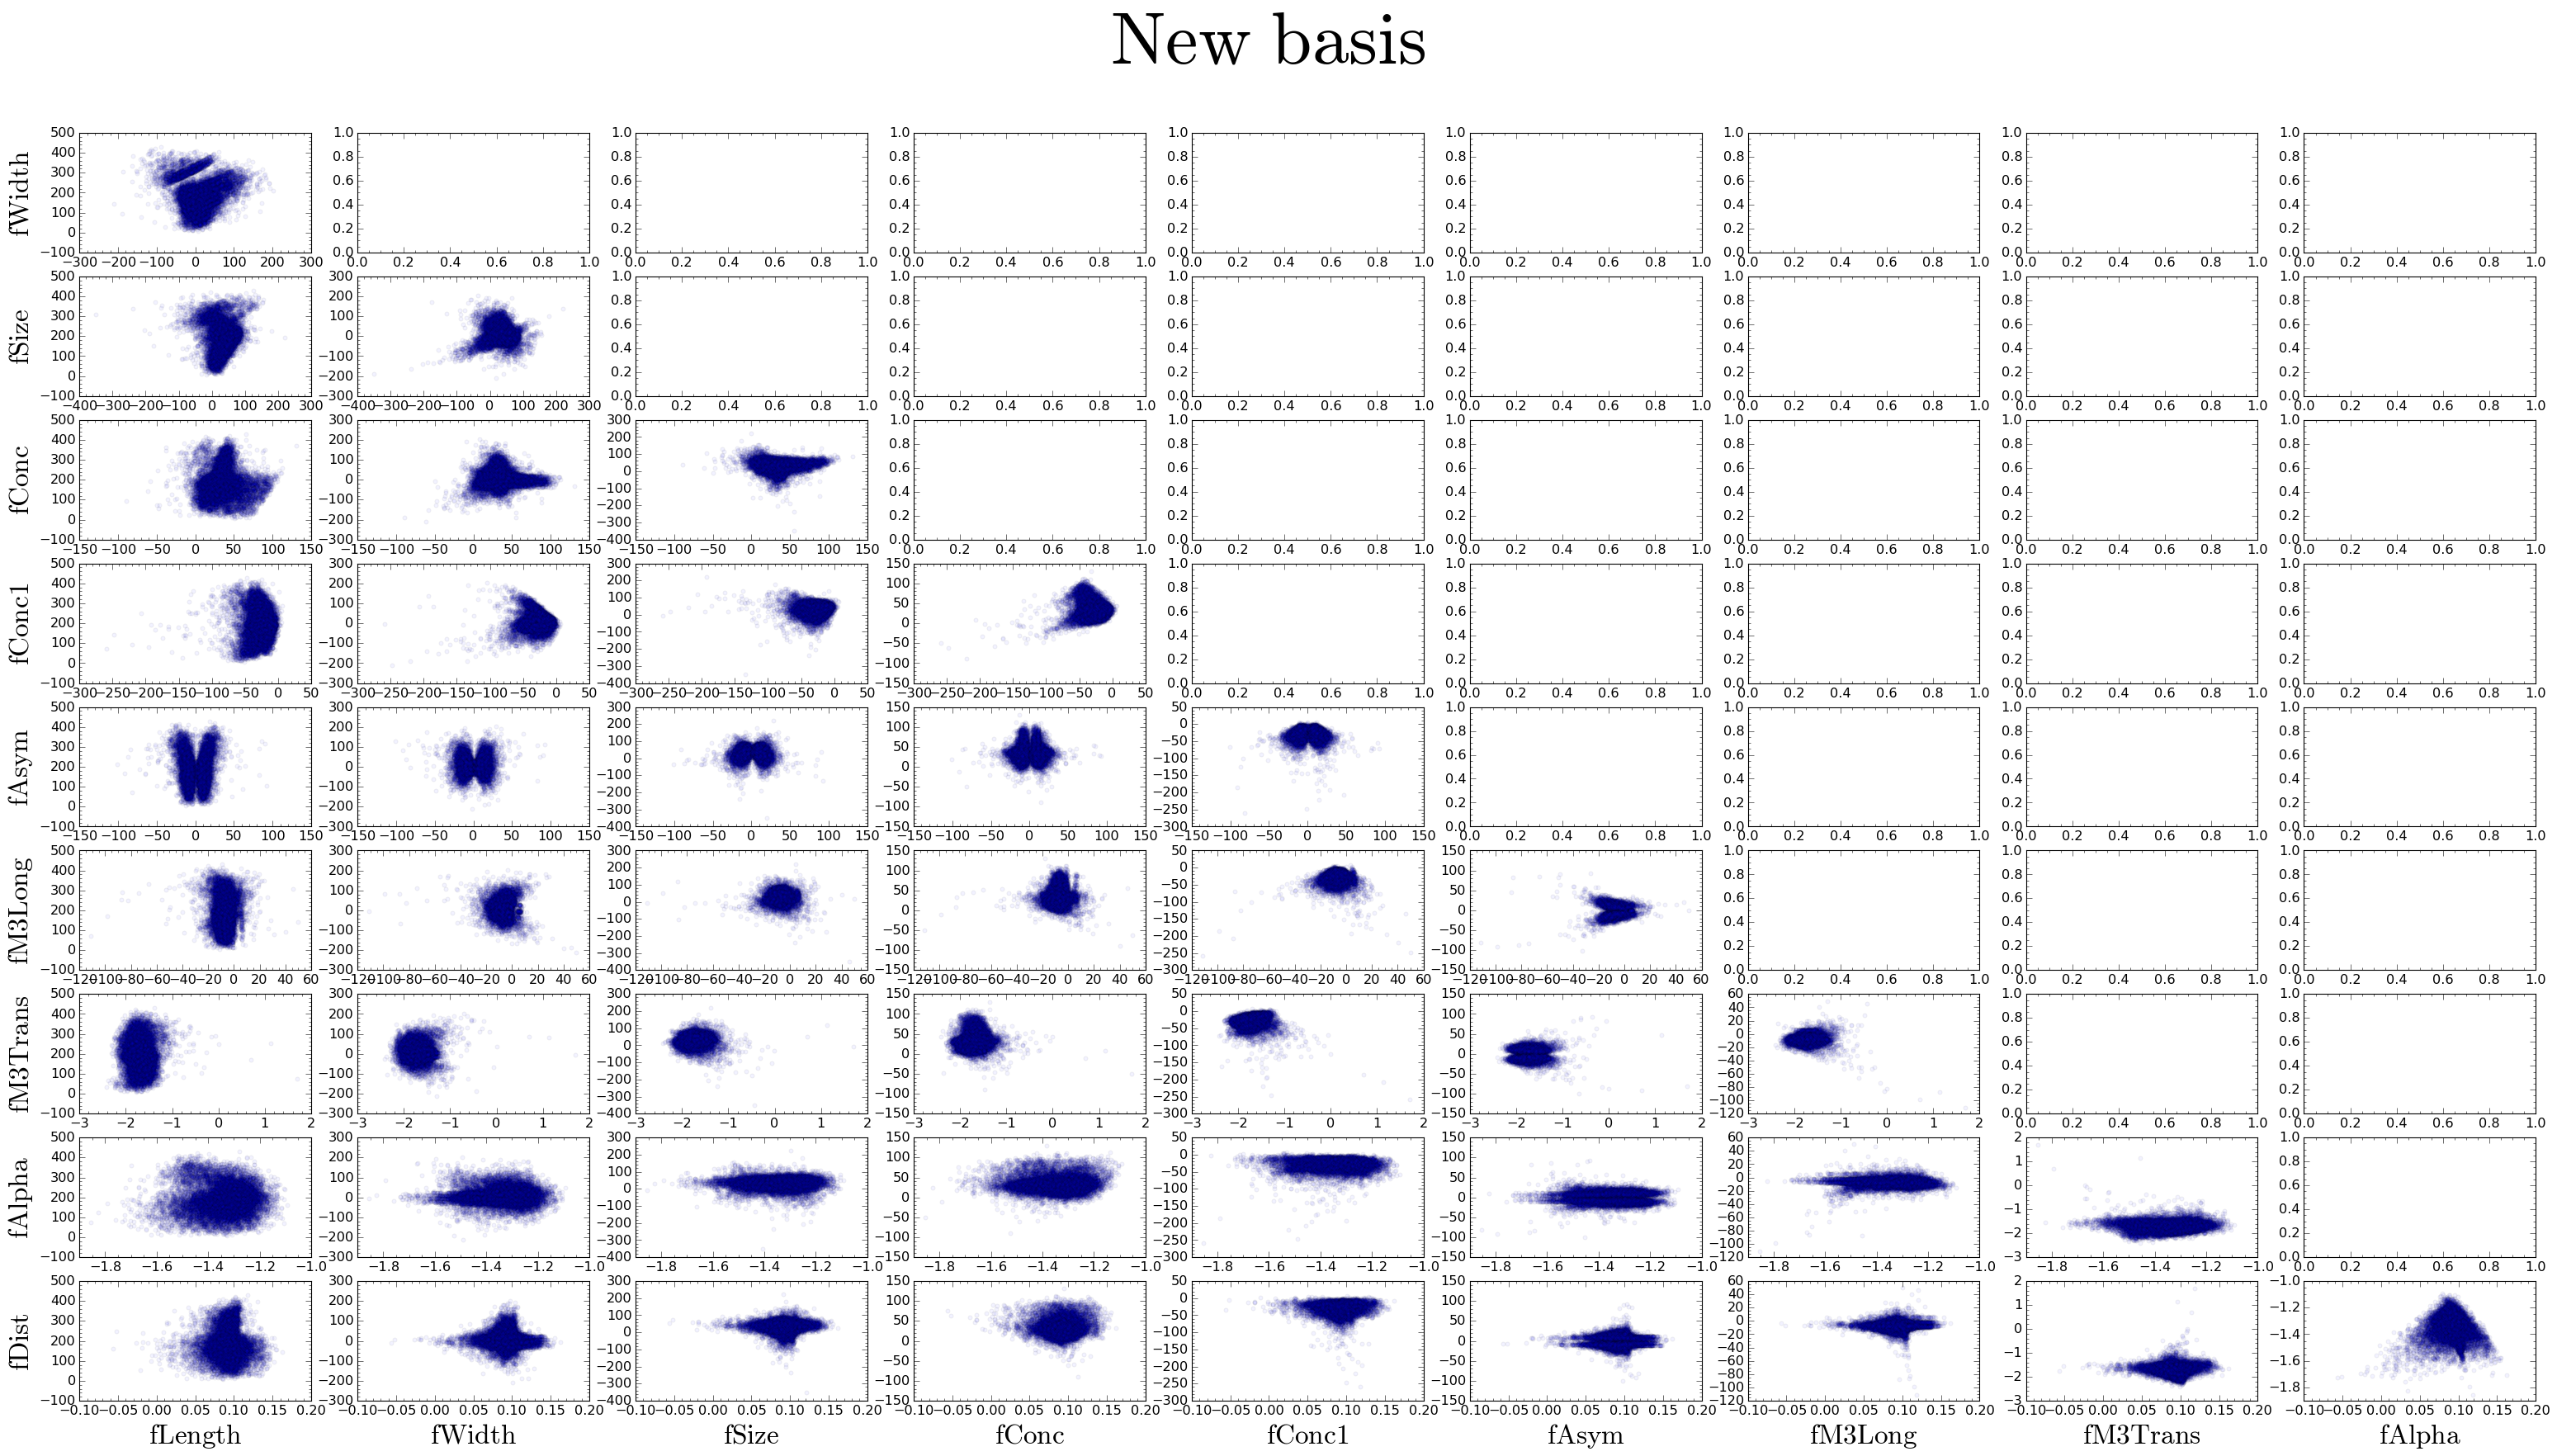

In [23]:
fig, ax = plt.subplots(9, 9); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [48, 24]
fig.suptitle("${\\rm Original\ basis}$", fontsize = 80)

for i in range(1, len(ax[:, 0])+1):
    for j in range(len(ax[0, :])):
        ax[i-1, j].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
        ax[i-1, j].minorticks_on()
        ax[i-1, j].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
        ax[i-1, j].tick_params(axis = 'both', labelsize = 14.5)

        if (i > j):
            ax[i-1, j].scatter([M[i, :]], [M[j, :]], alpha = 0.05)
        else:
            pass

        ax[8, j].set_xlabel("${\\rm %s}$" % classes[j], fontsize = 30)
        ax[i-1, 0].set_ylabel("${\\rm %s}$" % classes[i], fontsize = 30)
        






fig, ax = plt.subplots(9, 9); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [48, 24]
fig.suptitle("${\\rm New\ basis}$", fontsize = 80)

for i in range(1, len(ax[:, 0])+1):
    for j in range(len(ax[0, :])):
        ax[i-1, j].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
        ax[i-1, j].minorticks_on()
        ax[i-1, j].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
        ax[i-1, j].tick_params(axis = 'both', labelsize = 14.5)

        if (i > j):
            ax[i-1, j].scatter([Mp[i, :]], [Mp[j, :]], alpha = 0.05)
        else:
            pass

        ax[8, j].set_xlabel("${\\rm %s}$" % classes[j], fontsize = 30)
        ax[i-1, 0].set_ylabel("${\\rm %s}$" % classes[i], fontsize = 30)